In [124]:
import pandas as pd
##modelo de machine learning


In [125]:
datos = pd.read_csv("ventas.csv")

In [126]:
datos

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [127]:
datos.isnull().sum()

Fecha            0
DíaDeLaSemana    0
Promociones      0
Festivo          0
Ventas           0
dtype: int64

In [128]:
datos["Fecha"]=pd.to_datetime(datos["Fecha"])

In [129]:
datos

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [130]:
datos.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
escala = MinMaxScaler(feature_range=(0,1))
datos_para_preprocesar = datos.drop(["Fecha","Ventas"],axis=1).columns
normalizado = escala.fit_transform(datos[datos_para_preprocesar])

In [133]:
datos2 = pd.DataFrame(data = normalizado, columns = datos_para_preprocesar)
datos2["Fecha"] = datos["Fecha"]
datos2["Ventas"] = datos["Ventas"]

In [134]:
datos2

,DíaDeLaSemana,Promociones,Festivo,Fecha,Ventas
0,0.833333,0.0,0.0,2022-01-01,4033
1,1.000000,0.0,1.0,2022-01-02,4012
2,0.000000,0.0,0.0,2022-01-03,1608
3,0.166667,1.0,0.0,2022-01-04,2046
4,0.333333,0.0,0.0,2022-01-05,2484
...,...,...,...,...,...
360,0.166667,1.0,0.0,2022-12-27,2189
361,0.333333,0.0,0.0,2022-12-28,2548
362,0.500000,0.0,0.0,2022-12-29,3018
363,0.666667,0.0,0.0,2022-12-30,3591


In [135]:
X = datos2.drop(["Fecha","Ventas"],axis=1)
y = datos["Ventas"]

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [158]:
modelos = [("modelo_lineal",LinearRegression()),
            ("modelo_arbol",DecisionTreeRegressor()),
            ("modelo_random_forest",RandomForestRegressor())]

In [159]:
for nombre, modelo in modelos:
    modelo.fit(X_train,y_train)
    puntaje = modelo.score(X_test,y_test)
    print(f"{nombre}: {puntaje}")

modelo_lineal: 0.989165639933591
modelo_arbol: 0.9893687722589394
modelo_random_forest: 0.9893638059155915


In [165]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train,y_train)
prueba=modelo_lineal.predict(X_test)

In [162]:
import matplotlib.pyplot as plt

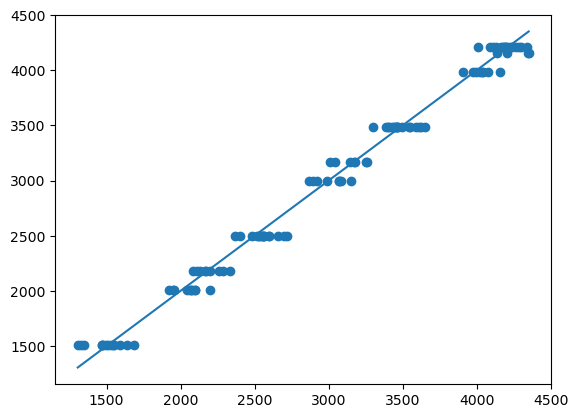

In [168]:
plt.scatter(y_test,prueba)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])